# (Credit card fraud detection)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "E:\MiniProject\creditcard.csv"

dataset = pd.read_csv(url)

dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

In [2]:
creditcard = dataset
print(creditcard.shape)

(284807, 31)


In [3]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
print(creditcard.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

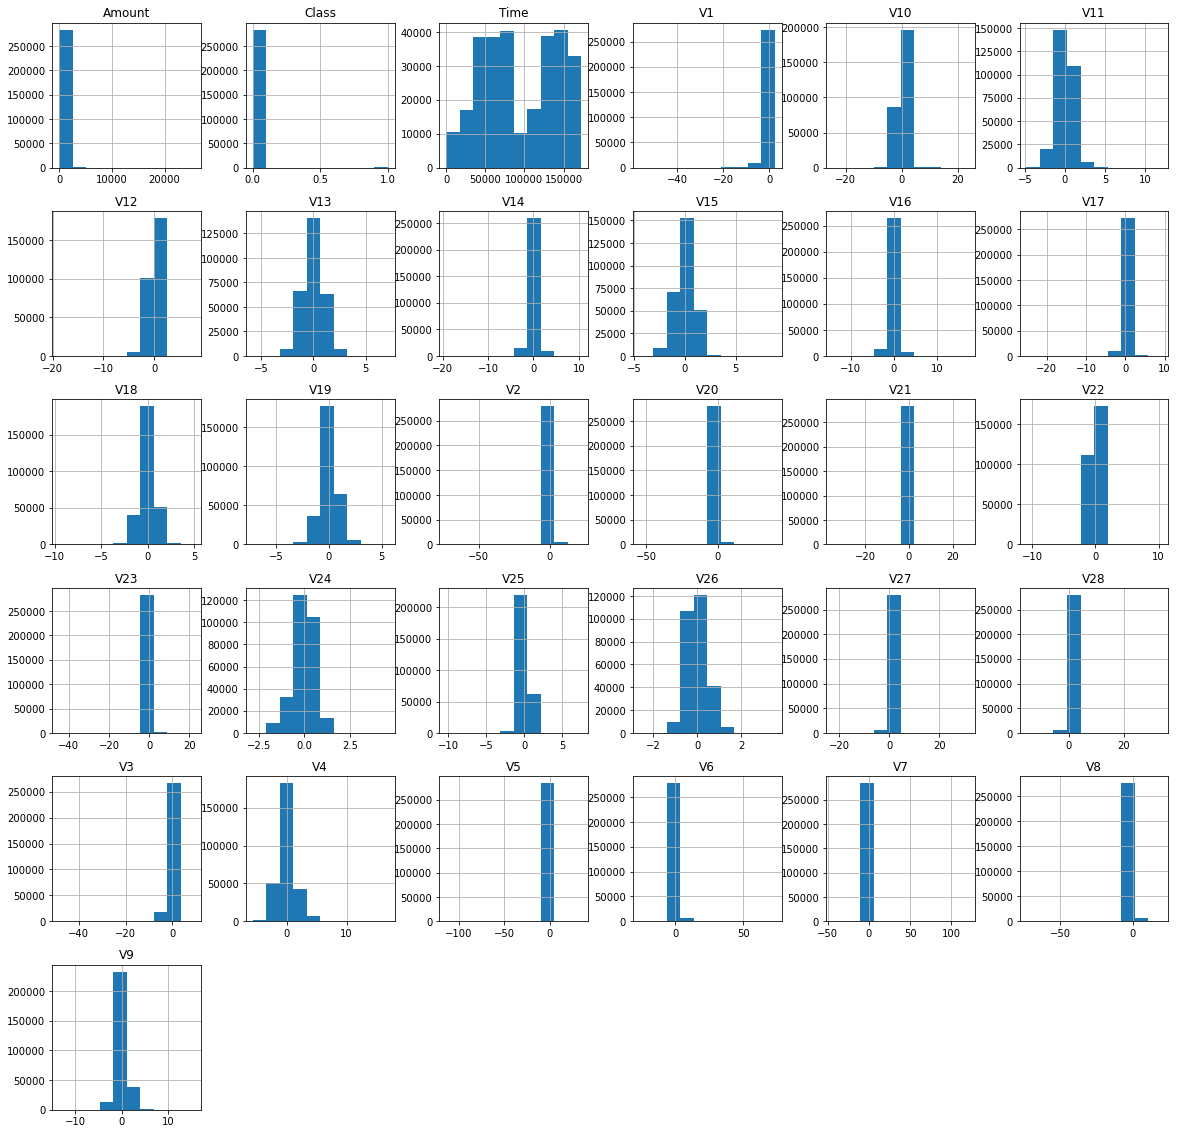

In [6]:
creditcard.hist(figsize = (20,20))
plt.show()

## 2-D Scatter Plot

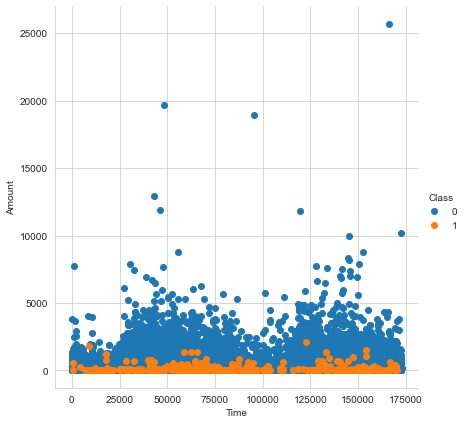

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

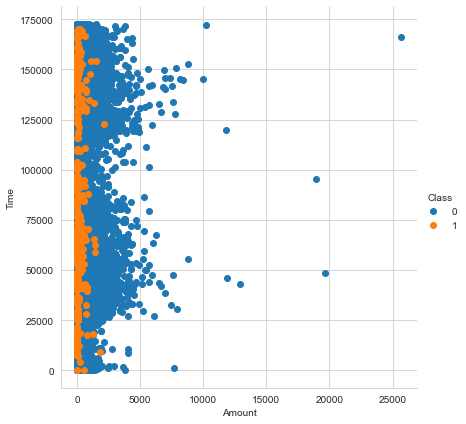

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", height = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

Observations:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

## 3D Scatter plot

In [9]:
FilteredData = creditcard[['Time','Amount', 'Class']]

In [10]:
FilteredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [11]:
print(FilteredData.shape)

(284807, 3)


In [12]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

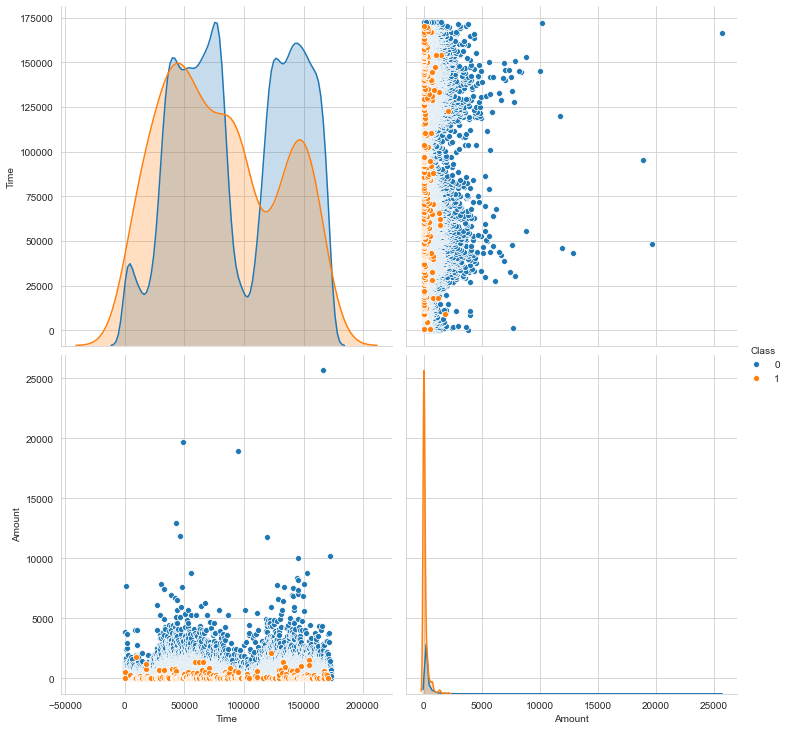

In [13]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", height=5);
plt.show()

In [14]:
countLess = 0
countMore= 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284357
449


In [15]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

Observations:

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [16]:
class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


In [17]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Observations:

Now the total number of fraud transactions in whole data are 492. It has been calculated that total number of fraud transactions in data where transaction amount is less than 2500 is also 492. Therefore, all 100% fraud transactions have transaction amount less than 2500 and there is no fraud transaction where transaction amount is more than 2500.

## Histogram 1D Scatter Plot

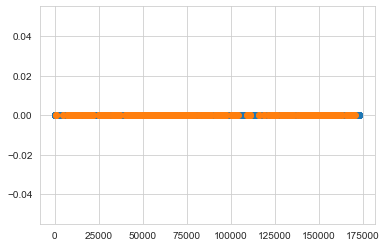

In [18]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

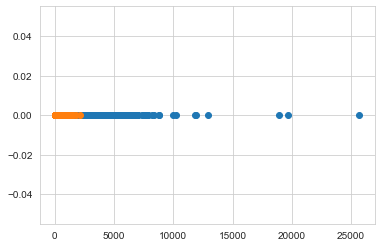

In [19]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

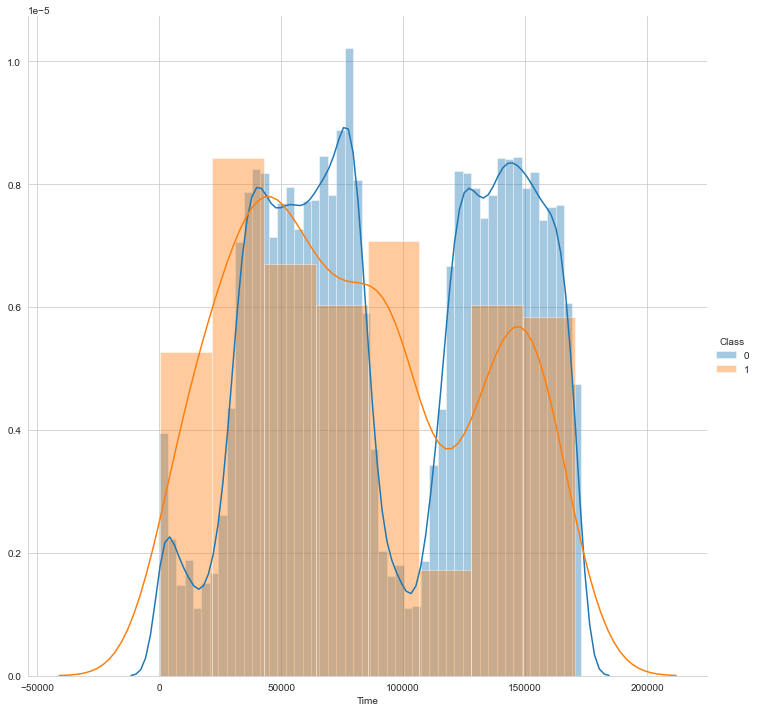

In [20]:
sns.FacetGrid(FilteredData, hue="Class", height=10).map(sns.distplot, "Time").add_legend()
plt.show()

Observations:

There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

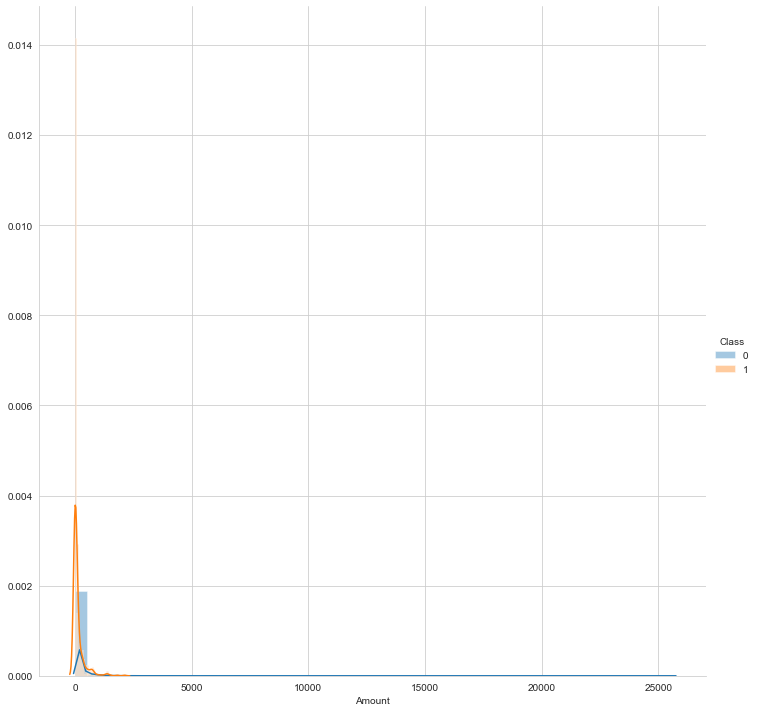

In [21]:
sns.FacetGrid(FilteredData, hue="Class", height=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

Hence, this is the best histogram we have



# Mean, Variance and Std-dev

In [22]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242231328
Mean of transaction amount of fraud transactions:  122.21132113821139


In [23]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874876
Std-Deviation of transaction amount of fraud transactions:  256.4222986132449


In [24]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [25]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# Similarity

In [26]:
from scipy import spatial

In [27]:
sampleData = creditcard.head(20000)   #Sample the data from original data so as to save the computation time.

In [28]:
samples = creditcard.loc[30401:30420]    #Taking sample of size 100 from index 30401 to 30420.

In [29]:
frame = []

In [30]:
for i in range(30401, 30420):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(20000):
        t2 = sampleData.loc[j]
        classLabel = creditcard.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []

Top 10 transactions having highest similarity with transaction ID = 30401 and class = 0.0:
       Class  Similarity  Transaction ID
16709    0.0         1.0           16709
18754    0.0         1.0           18754
15840    0.0         1.0           15840
16254    0.0         1.0           16254
18586    0.0         1.0           18586
16628    0.0         1.0           16628
18438    0.0         1.0           18438
18046    0.0         1.0           18046
15946    0.0         1.0           15946
14804    0.0         1.0           14804


Top 10 transactions having highest similarity with transaction ID = 30402 and class = 0.0:
       Class  Similarity  Transaction ID
19040    0.0         1.0           19040
16720    0.0         1.0           16720
18994    0.0         1.0           18994
19142    0.0         1.0           19142
15480    0.0         1.0           15480
17628    0.0         1.0           17628
17591    0.0         1.0           17591
17876    0.0         1.0           17

Top 10 transactions having highest similarity with transaction ID = 30417 and class = 0.0:
       Class  Similarity  Transaction ID
18282    0.0         1.0           18282
16276    0.0         1.0           16276
19010    0.0         1.0           19010
19241    0.0         1.0           19241
14453    0.0         1.0           14453
16129    0.0         1.0           16129
17456    0.0         1.0           17456
19496    0.0         1.0           19496
16235    0.0         1.0           16235
16518    0.0         1.0           16518


Top 10 transactions having highest similarity with transaction ID = 30418 and class = 0.0:
       Class  Similarity  Transaction ID
18914    0.0         1.0           18914
19552    0.0         1.0           19552
16206    0.0         1.0           16206
14957    0.0         1.0           14957
16093    0.0         1.0           16093
16156    0.0         1.0           16156
18677    0.0         1.0           18677
18012    0.0         1.0           18

# Applying KNN Classifier

In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 30].values

In [32]:
#Printing the no of rows and columns
print("X ->",X.shape) 
print("y ->",y.shape)

X -> (284807, 30)
y -> (284807,)


Observations:


    X - Contains remaining all indices i.e time,amount,v1....v29 etc 
    Y - Contains last index values i.e class variable 0 or 1 (0 means normal Transaction,1 means Fruad Transaction)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Observations:
    
    Training and Testing Data are splited in ratio of test_size i.e 0.2 (80%,20%)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 227845
Length of X_test is: 56962
Length of y_train is: 227845
Length of y_test is: 56962


In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
print("Actual Values:",y_test,"Predicted Values:",y_pred)

Actual Values: [0 0 0 ... 0 0 0] Predicted Values: [0 0 0 ... 0 0 0]


In [39]:
print("No of Actual Values are: {y_test}".format(y_test = len(y_test)))
df1 = pd.DataFrame(y_test, columns=["Class"])
df1["Class"].value_counts()

No of Actual Values are: 56962


0    56869
1       93
Name: Class, dtype: int64

In [40]:
print("No of Predicted Values is: {y_pred}".format(y_pred = len(y_pred)))
df = pd.DataFrame(y_pred, columns=["Class"])
df["Class"].value_counts()

No of Predicted Values is: 56962


0    56883
1       79
Name: Class, dtype: int64

Observations:

             0 indicates genuine transaction
             1 indicates fruad transaction

In [41]:
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_test[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           FP += 1
        if y_test[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1

    print("True Positive Values are {}".format(TP))
    print("False Positive Values are {}".format(FP))
    print("True Negative Values are {}".format(TN))
    print("False Negative Values are {}".format(FN))

True Positive Values are 75
False Positive Values are 4
True Negative Values are 56865
False Negative Values are 18


Observations:

             TP = True Positive. Fraudulent transactions the model predicts as fraudulent.
             TN = True Negative. Normal transactions the model predicts as normal.
             FP = False Positive. Normal transactions the model predicts as fraudulent.
             FN = False Negative. Fraudulent transactions the model predicts as normal.


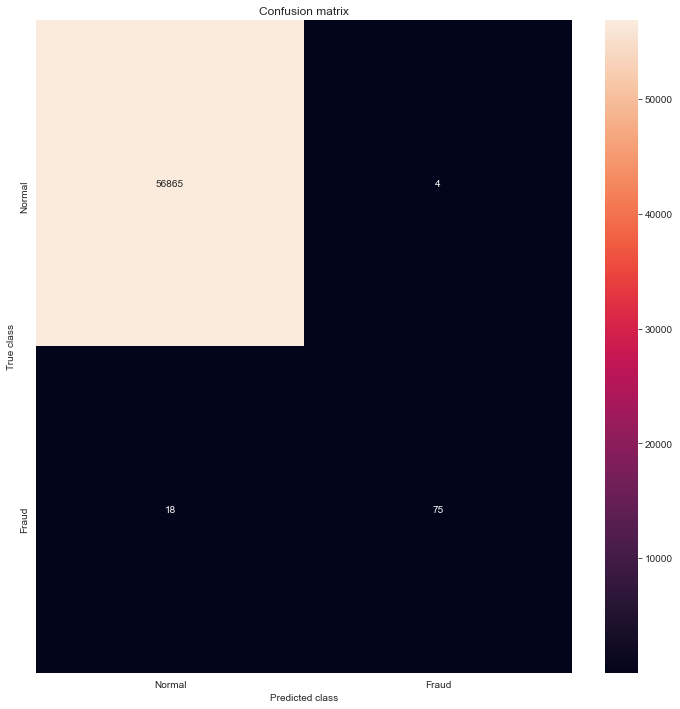

In [42]:
# printing the confusion matrix 
from sklearn.metrics import confusion_matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [43]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  

n_errors = (y_pred != y_test).sum() 

print("The model used is KNN classifier")
print("\n")
print("No of Outliers are",n_errors)

# Overall accuracy
#ACC = (TP+TN)/(TP+FP+FN+TN)
acc = accuracy_score(y_test, y_pred) 
print("The accuracy of this algorithm is {}".format(acc)) 

# Precision or positive predictive value
#PPV = TP/(TP+FP)
prec = precision_score(y_test, y_pred) 
print("The precision or positive predictive value is {}".format(prec)) 

# Sensitivity, hit rate, recall, or true positive rate
#rec = TP/(TP+FN)
rec = recall_score(y_test, y_pred) 
print("The recall or true positive rate is {}".format(rec)) 
  
f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The model used is KNN classifier


No of Outliers are 22
The accuracy of this algorithm is 0.9996137776061234
The precision or positive predictive value is 0.9493670886075949
The recall or true positive rate is 0.8064516129032258
The F1-Score is 0.872093023255814
The Matthews correlation coefficient is 0.8748123648167742


In [44]:
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("The Specificity or true negative rate is {}".format(TNR))

# Negative predictive value
NPV = TN/(TN+FN)
print("The Negative predictive value is {}".format(NPV))

# False negative rate
FNR = FN/(TP+FN)
print("The False negative rate is {}".format(FNR))

# False discovery rate
FDR = FP/(TP+FP)
print("The False discovery rate is {}".format(FDR))



The Specificity or true negative rate is 0.9999296629094937
The Negative predictive value is 0.9996835609936184
The False negative rate is 0.1935483870967742
The False discovery rate is 0.05063291139240506


In [45]:
# Overall accuracy
ACC = ((TP+TN)/(TP+FP+FN+TN))*100
ACCU=round(ACC,3)
print("Overall Accuracy by using this KNN Classifier is {}%".format(ACCU))


Overall Accuracy by using this KNN Classifier is 99.961%


Observations:
         
         Hence By Using this We Can Detect any Credit Card Fraud at a Accuracy of 99.96%